In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/cocktail_dmlr')

In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [5]:
menu = pd.read_csv('/content/drive/MyDrive/cocktail_dmlr/Data/menu_cleaned.csv')

# Define old and new feature names
long_name = 'egg white (pasteurised) or aquafaba (chickpea water) or 3 dashes fee brothers fee foam cocktail foamer'
short_name = 'egg white (pasteurised)'

# Rename in both datasets
menu.rename(columns={long_name: short_name}, inplace=True)
#recipe.rename(columns={long_name: short_name}, inplace=True)

# Update ingredient column sets
ingredient_cols_menu = menu.columns.difference(['name', 'dg_rating', 'dd_rating'])
#ingredient_cols_recipe = recipe.columns.difference(['name', 'dg_rating', 'dd_rating'])

In [10]:
# Use dg_rating as target
X = menu.drop(columns=['name', 'dd_rating', 'dg_rating'], errors='ignore')
y_regression = menu.loc[X.index, 'dg_rating']

# Single split for all modeling types
X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

# Classification targets (as strings)
y_clf_train = y_reg_train.astype(str)
y_clf_test = y_reg_test.astype(str)

<Axes: title={'center': 'Random Forest MDI (Top 20)'}>

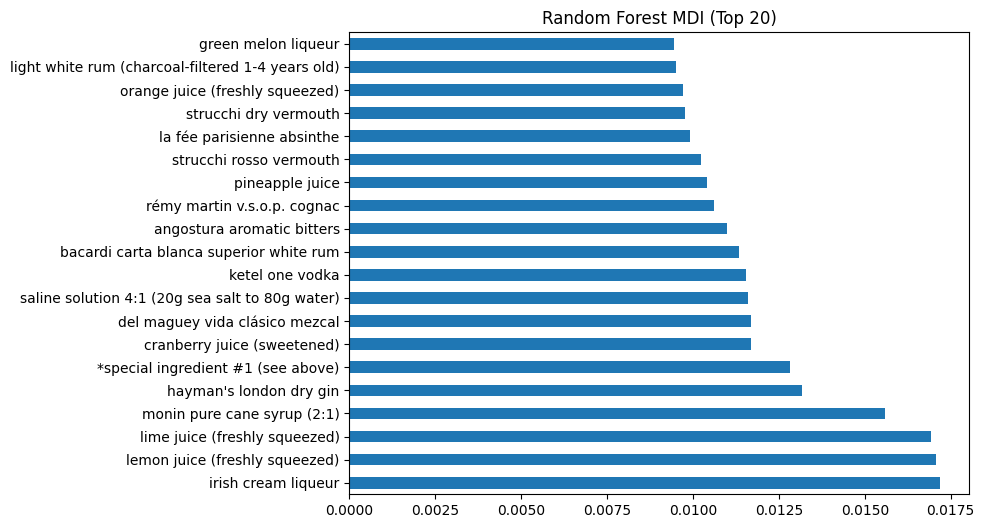

In [12]:
# Replace with best_params from your tuned model
rf_best_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 2,
    'max_features': 'sqrt'
}

rf_model = RandomForestRegressor(random_state=42, **rf_best_params)
rf_model.fit(X_train, y_reg_train)

# Extract MDI importances
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_importances_sorted = rf_importances.sort_values(ascending=False)

# Top features
rf_importances_sorted.head(20).plot(kind='barh', figsize=(8, 6), title='Random Forest MDI (Top 20)')


<Axes: title={'center': 'XGBoost MDI (Top 20)'}>

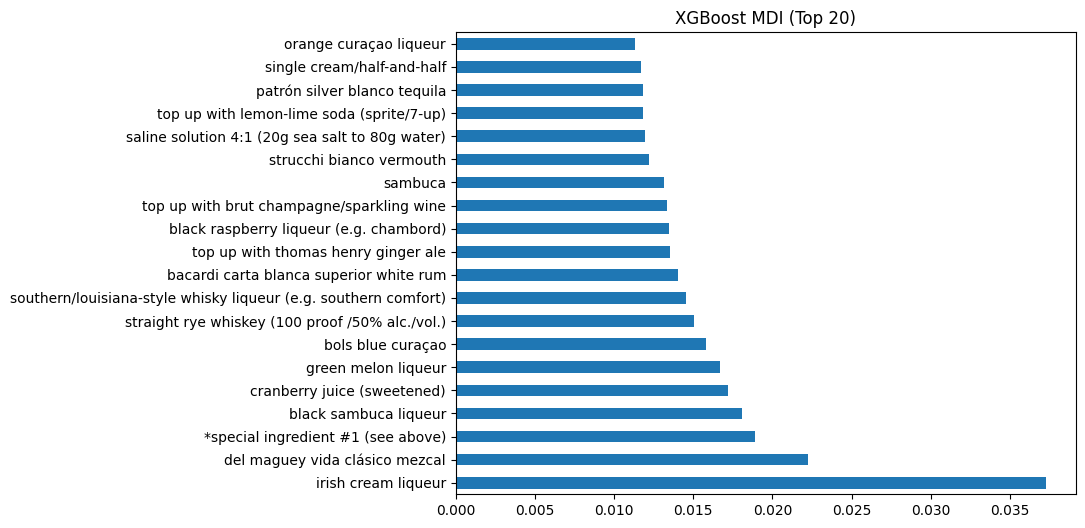

In [16]:
# Replace with best_params from your tuned XGBoost regressor
xgb_best_params = {
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 1
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **xgb_best_params)
xgb_model.fit(X_train, y_reg_train)

# MDI-based feature importances
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_importances_sorted = xgb_importances.sort_values(ascending=False)

# Top features
xgb_importances_sorted.head(20).plot(kind='barh', figsize=(8, 6), title='XGBoost MDI (Top 20)')